## GIVE ME SOME CREDIT

### LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import xgboost

### Opening the Dataset

In [2]:
df = pd.read_csv('./data/train.csv', index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

As we can see, some of the values in the dataset are NULL, so we must do something with them to get a useful model.

In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,104805.000000,104805.000000,104805.000000,104805.000000,104805.000000,8.402400e+04,104805.000000,104805.000000,104805.000000,104805.000000,102056.000000
mean,0.066314,5.602014,52.351128,0.416077,354.859470,6.684453e+03,8.454854,0.259988,1.019551,0.235571,0.756065
std,0.248831,217.389876,14.765944,4.139291,2169.182855,1.565313e+04,5.127986,4.115594,1.136847,4.101263,1.112162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029801,41.000000,0.000000,0.175026,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153984,52.000000,0.000000,0.366626,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559168,63.000000,0.000000,0.867267,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [5]:
df.SeriousDlqin2yrs.value_counts() #La muestra está muy desbalanceada

0    97855
1     6950
Name: SeriousDlqin2yrs, dtype: int64

The TARGET DATA are very unbalanced, so we must take it into consideration.

<AxesSubplot:>

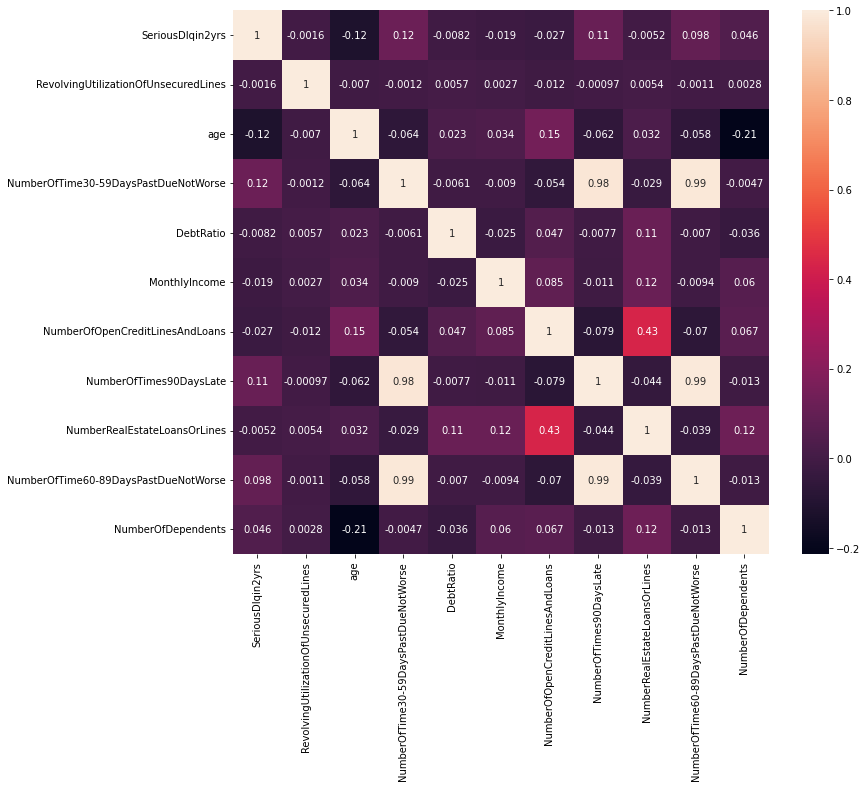

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104805 entries, 1 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      104805 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  104805 non-null  float64
 2   age                                   104805 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  104805 non-null  int64  
 4   DebtRatio                             104805 non-null  float64
 5   MonthlyIncome                         84024 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       104805 non-null  int64  
 7   NumberOfTimes90DaysLate               104805 non-null  int64  
 8   NumberRealEstateLoansOrLines          104805 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  104805 non-null  int64  
 10  NumberOfDependents                    102056 non-null  float64
dtype

In [3]:
# df = df.drop(['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

<AxesSubplot:>

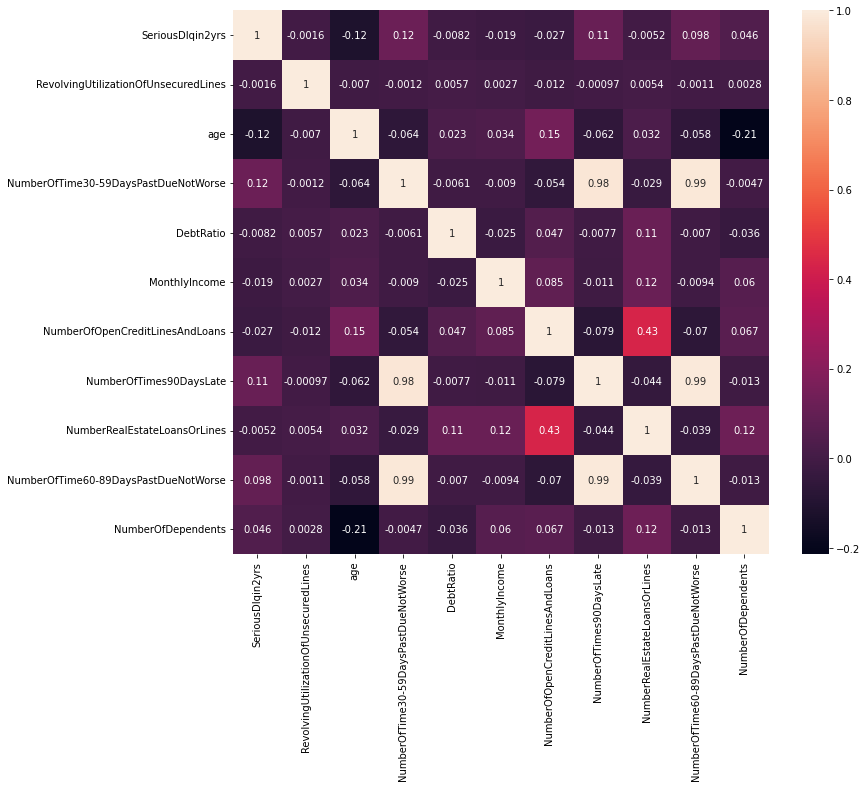

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Data Preparation and Manipulation

Spliting the dataset into features and target. Then, both will be splitted into train and test data.

In [4]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Converting the NULL values with **SimpleImputer**.

In [5]:
simple_imputer1 = SimpleImputer(strategy='median')
simple_imputer1.fit(df[['MonthlyIncome']])
X_train['MonthlyIncome'] = simple_imputer1.transform(X_train[['MonthlyIncome']])
X_test['MonthlyIncome'] = simple_imputer1.transform(X_test[['MonthlyIncome']])

In [6]:
simple_imputer2 = SimpleImputer(strategy='most_frequent')
simple_imputer2.fit(df[['NumberOfDependents']])
X_train['NumberOfDependents'] = simple_imputer2.transform(X_train[['NumberOfDependents']])
X_test['NumberOfDependents'] = simple_imputer2.transform(X_test[['NumberOfDependents']])

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Finding the best parameters

This time, we will use **RandomForestClassifier**. First of all, we declare the parameters we want to iterate to find the optimum one.

In [14]:
parameters = {
    'n_estimators': [100,150,200,250,300,400,500,1000], 
    'max_depth': [5,6,10,15,20,25,30,35,40]
    }

In [15]:
def rfc_tester(**params):
    '''That function recieves the parameters we want to iterate and makes the model. It returns the AUC scores.'''
    rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced", **params)
    rf.fit(X_train, y_train)
    accs = roc_auc_score(y_train, rf.predict(X_train)), roc_auc_score(y_test, rf.predict(X_test))
    return accs

In [22]:
def xgb_tester(**params):
    rf = xgboost.XGBClassifier(random_state=0, n_jobs=-1, scale_pos_weight=(df.SeriousDlqin2yrs.value_counts()[0]) / df.SeriousDlqin2yrs.value_counts()[1], **params)
    rf.fit(X_train, y_train)
    accs = roc_auc_score(y_train, rf.predict(X_train)), roc_auc_score(y_test, rf.predict(X_test))
    return accs

In this peace of code, we iterate over the parameters we declared and we collect them in a dataframe for representing them in a graphic to compare them and take the best.

In [16]:
rf_scores = pd.DataFrame(columns=('n_estimators','max_depth','train_auc','test_auc'))
cols = list(rf_scores)
rf_data = []
for n in parameters['n_estimators']:
    for depth in parameters['max_depth']:
        aucs = rfc_tester(n_estimators=n, max_depth=depth)
        values = [n, depth, aucs[0], aucs[1]]
        zipped = zip(cols, values)
        param_dict = dict(zipped)
        rf_data.append(param_dict)
rf_scores = rf_scores.append(rf_data, True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_25492\4158380219.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_scores = rf_scores.append(rf_data, True)


Here are the optimum values for the RandomForest model.

In [18]:
print(rf_scores[rf_scores['train_auc']==rf_scores['train_auc'].max()])
print(rf_scores[rf_scores['test_auc']==rf_scores['test_auc'].max()])

   n_estimators max_depth train_auc  test_auc
16          150        35  0.999661  0.576381
17          150        40  0.999661  0.573008
   n_estimators max_depth train_auc  test_auc
28          250         6  0.785865  0.789334


Let see them into a plot. Here we are the representation of the different values we took. As we can see, the n_estimators value is not very representative, but, in the second one, we can see that the max_depth optimum value is 10. After 10, we have mor AUC with the training data, but the test data AUC decreases, what means that it starts the overfitting.

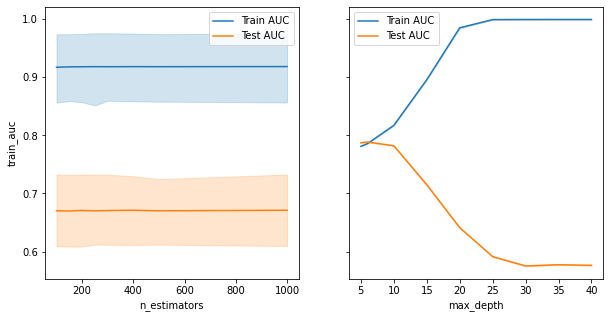

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.lineplot(data=rf_scores, x='n_estimators', y='train_auc', ax=ax[0], label='Train AUC')
sns.lineplot(data=rf_scores, x='n_estimators', y='test_auc', ax=ax[0], label='Test AUC')
ax[0].set_ylabel='AUC'
ax[0].legend()

sns.lineplot(data=rf_scores, x='max_depth', y='train_auc', ax=ax[1], label='Train AUC')
sns.lineplot(data=rf_scores, x='max_depth', y='test_auc', ax=ax[1], label='Test AUC')
ax[1].legend()

With the data we obtained with the plots, we can do our final prediction model.

In [20]:
rf_clf = RandomForestClassifier(random_state=0, class_weight="balanced", n_estimators=250, max_depth=6)
rf_clf.fit(X_train, y_train)

best_train_acc = roc_auc_score(y_train, rf_clf.predict(X_train))
predictions = rf_clf.predict(X_test)
best_test_acc = roc_auc_score(y_test, predictions)
model_accs = (best_train_acc, best_test_acc)
print(model_accs)

(0.7858652442997124, 0.7893343681782048)


In [23]:
rf_scores = pd.DataFrame(columns=('n_estimators','max_depth','train_auc','test_auc'))
cols = list(rf_scores)
rf_data = []
for n in parameters['n_estimators']:
    for depth in parameters['max_depth']:
        accs = xgb_tester(n_estimators=n, max_depth=depth)
        values = [n, depth, aucs[0], aucs[1]]
        zipped = zip(cols, values)
        param_dict = dict(zipped)
        rf_data.append(param_dict)
rf_scores = rf_scores.append(rf_data, True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_25492\2030710766.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rf_scores = rf_scores.append(rf_data, True)


In [24]:
print(rf_scores[rf_scores['train_auc']==rf_scores['train_auc'].max()])
print(rf_scores[rf_scores['test_auc']==rf_scores['test_auc'].max()])

   n_estimators max_depth train_auc  test_auc
0           100         5  0.999623  0.576886
1           100         6  0.999623  0.576886
2           100        10  0.999623  0.576886
3           100        15  0.999623  0.576886
4           100        20  0.999623  0.576886
..          ...       ...       ...       ...
67         1000        20  0.999623  0.576886
68         1000        25  0.999623  0.576886
69         1000        30  0.999623  0.576886
70         1000        35  0.999623  0.576886
71         1000        40  0.999623  0.576886

[72 rows x 4 columns]
   n_estimators max_depth train_auc  test_auc
0           100         5  0.999623  0.576886
1           100         6  0.999623  0.576886
2           100        10  0.999623  0.576886
3           100        15  0.999623  0.576886
4           100        20  0.999623  0.576886
..          ...       ...       ...       ...
67         1000        20  0.999623  0.576886
68         1000        25  0.999623  0.576886
69         

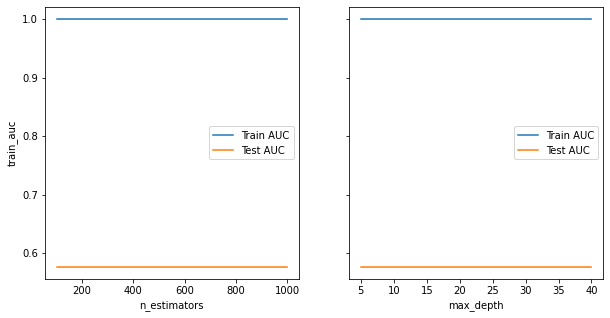

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.lineplot(data=rf_scores, x='n_estimators', y='train_auc', ax=ax[0], label='Train AUC')
sns.lineplot(data=rf_scores, x='n_estimators', y='test_auc', ax=ax[0], label='Test AUC')
ax[0].set_ylabel='AUC'
ax[0].legend()

sns.lineplot(data=rf_scores, x='max_depth', y='train_auc', ax=ax[1], label='Train AUC')
sns.lineplot(data=rf_scores, x='max_depth', y='test_auc', ax=ax[1], label='Test AUC')
ax[1].legend()

### TESTING THE RESULTS

First of all, let's open the test dataset.

In [13]:
test = pd.read_csv('./data/test.csv', index_col=0)

Here, we can see the same problems we had in the training dataset, so it has to be modified in the same way we did before.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 149997
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  45195 non-null  float64
 1   age                                   45195 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45195 non-null  int64  
 3   DebtRatio                             45195 non-null  float64
 4   MonthlyIncome                         36245 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       45195 non-null  int64  
 6   NumberOfTimes90DaysLate               45195 non-null  int64  
 7   NumberRealEstateLoansOrLines          45195 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  45195 non-null  int64  
 9   NumberOfDependents                    44020 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.8 MB


In [14]:
imputer1_2 = SimpleImputer(strategy='median').fit(test[['MonthlyIncome']])
test['MonthlyIncome'] = imputer1_2.transform(test[['MonthlyIncome']])

imputer2_2 = SimpleImputer(strategy='most_frequent').fit(test[['NumberOfDependents']])
test['NumberOfDependents'] = imputer2_2.transform(test[['NumberOfDependents']])

In [22]:
test = test.drop(['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'], axis=1)

Now, let's make the prediction of the values with the provided data.

In [23]:
test['SeriousDlqin2yrs'] = rf_clf.predict(test)

We have a dataframe with the same columns as the original one. We just need the target column and the index, so we make a new dataframe with them.

In [24]:
submision_prediction = pd.DataFrame(data = test, index = test.index,  columns = ['SeriousDlqin2yrs'])

Finally, the results are ready to be exported to a CSV file.

In [25]:
submision_prediction.to_csv('submision_para_cv.csv')